In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from code.gene import evolution, score_model
import os

In [2]:
predict_model = score_model(model_path = "model/transformer1008A1.pth")

In [3]:
left = 1000
mutation_rate = 0.01
epochs = 500

In [4]:
evolution_exe = evolution(select_rate=left,
                          temp_file_path = "creature/20231119",
                          max_length = 10,
                          score_model = predict_model)

In [5]:
final_result, evolution_history = \
evolution_exe.genetic(mutation_rate = mutation_rate,
                      num_generation = epochs,
                      population = left * 2,
                      constant_length = True,
                      temp_interval = False)
#evolution_exe._write_into_temp(final_result, left, mutation_rate, epochs)

INFO: Temp folder is ready.


  0%|          | 0/500 [00:00<?, ?it/s]

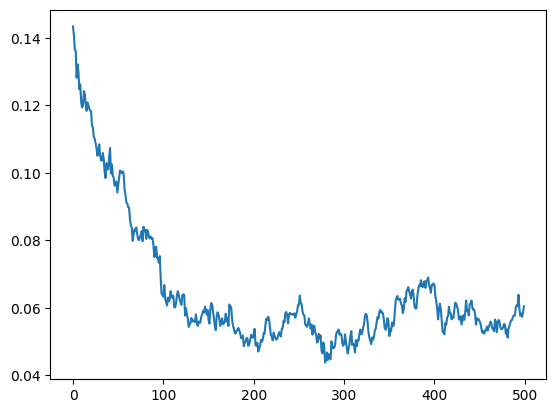

In [7]:
plt.plot(np.arange(epochs), evolution_history[:,1])

In [14]:
final_encode = evolution_exe.pre_transform(final_result)
final_AP_value = predict_model.predict(final_encode)

start_encode = evolution_exe.pre_transform(evolution_exe.start_record)
start_AP_value = predict_model.predict(start_encode)

In [15]:
np.save("data/gene_result/cluster_gene_start.npy", start_encode)
np.save("data/gene_result/labelAP_gene_start.npy", start_AP_value)

np.save("data/gene_result/cluster_gene_final.npy", final_encode)
np.save("data/gene_result/labelAP_gene_final.npy", final_AP_value)

Text(0.5, 0, 'AP value')

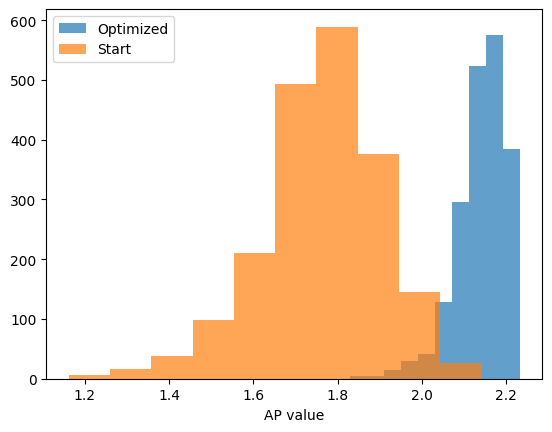

In [16]:
plt.hist(final_AP_value, alpha = 0.7, label = "Optimized")
plt.hist(start_AP_value, alpha = 0.7, label = "Start")
plt.legend()
plt.xlabel("AP value")